In [36]:
import warnings 
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [38]:
INFOSYS= pd.read_csv("infy_df.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.79492,0.79668,0.79102,0.79668,-0.000436,204800.0
1,1996-01-02,0.79492,0.79883,0.79346,0.79346,-0.000435,204800.0
2,1996-01-03,0.79883,0.79883,0.79883,0.79883,-0.000437,102400.0
3,1996-01-04,0.79102,0.79492,0.79102,0.79355,-0.000435,307200.0
4,1996-01-05,0.78418,0.78418,0.78418,0.78418,-0.000429,51200.0


In [39]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6.175000e+03
mean,284.214542,287.710074,280.646182,284.173218,191.532802,1.584464e+07
std,244.364213,246.941411,241.904329,244.416816,247.506413,1.634486e+07
min,0.763180,0.765630,0.712890,0.763180,-0.007392,0.000000e+00
25%,70.226548,71.241799,68.411350,69.844902,3.803389,6.288047e+06
50%,232.488007,235.688004,228.455994,232.268997,70.577179,9.981328e+06
75%,459.375000,463.500000,454.637497,459.403503,326.698257,1.910883e+07
max,1257.900024,1265.500000,1255.800049,1260.449951,1260.449951,2.766150e+08


In [40]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6175 entries, 0 to 6304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6175 non-null   object 
 1   Open       6175 non-null   float64
 2   High       6175 non-null   float64
 3   Low        6175 non-null   float64
 4   Close      6175 non-null   float64
 5   Adj Close  6175 non-null   float64
 6   Volume     6175 non-null   float64
dtypes: float64(6), object(1)
memory usage: 385.9+ KB


In [41]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [42]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,0.00176,0.00566
1,-0.00146,0.00537
2,0.00000,0.00000
3,0.00253,0.00390
4,0.00000,0.00000


In [43]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [44]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [45]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

scores = []

for num_trees in range(1, 41):
    clf = RandomForestClassifier(n_estimators=num_trees)
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    scores.append(np.mean(cv_scores))


In [47]:
print(scores[0])

0.5101181203547805


In [48]:
print(scores[1])

0.4924703518958527


In [50]:
rfc = RandomForestClassifier(n_estimators=16)

In [51]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [52]:
rfc_pred = rfc.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.50      0.61      0.55       594
           1       0.55      0.44      0.49       641

    accuracy                           0.52      1235
   macro avg       0.53      0.53      0.52      1235
weighted avg       0.53      0.52      0.52      1235



In [55]:
print(confusion_matrix(Y_test, rfc_pred))

[[365 229]
 [360 281]]


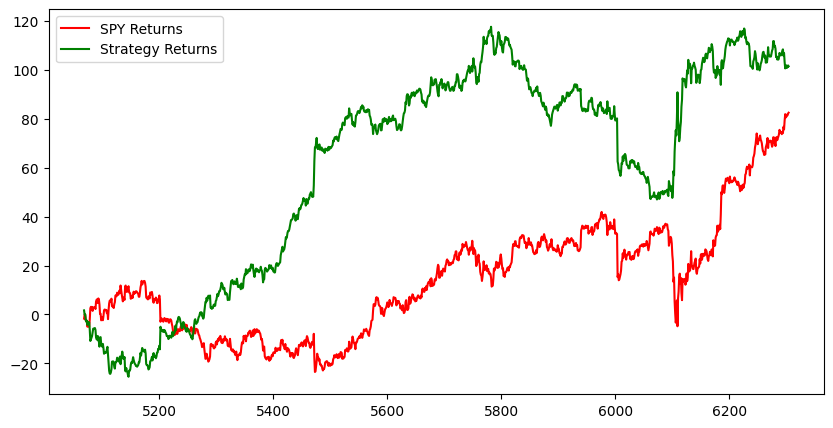

In [56]:
INFOSYS['Predicted_Signal'] = rfc.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100
 
INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [57]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 1.07


In [58]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [59]:
probability = model.predict_proba(X_test)
print(probability)

[[0.625  0.375 ]
 [0.8125 0.1875]
 [0.3125 0.6875]
 ...
 [0.4375 0.5625]
 [0.8125 0.1875]
 [0.625  0.375 ]]


In [60]:
predicted = rfc.predict(X_test)

In [61]:
from sklearn import metrics

In [62]:
print(metrics.confusion_matrix(Y_test, predicted))

[[347 247]
 [349 292]]


In [63]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.50      0.58      0.54       594
           1       0.54      0.46      0.49       641

    accuracy                           0.52      1235
   macro avg       0.52      0.52      0.52      1235
weighted avg       0.52      0.52      0.52      1235



In [64]:
print(model.score(X_train,Y_train))

0.9838056680161943
